# growth rates of GDP and employment

# references

- [OECD Employment Outlook 2016 table 1.A1.1](http://www.oecd.org/els/oecd-employment-outlook-19991266.htm)

# import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
pd.set_option("display.max_columns", 100)
sns.set(context = "paper", font = "monospace")

GDP_raw        = pd.read_csv("OECD_Employment_Outlook_2016_growth_rates_real_GDP.csv",        delimiter = ",")
employment_raw = pd.read_csv("OECD_Employment_Outlook_2016_growth_rates_real_employment.csv", delimiter = ",")

GDP            = GDP_raw
employment     = employment_raw

# a quick look

In [2]:
GDP.head()

,country,OECD_membership,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,OECD,OECD,2.7,0.2,-3.5,3.0,1.9,1.3,1.2,1.9,2.1,1.8,2.1
1,Euro area,OECD,3.0,0.4,-4.5,2.0,1.6,-0.9,-0.3,1.0,1.6,1.6,1.7
2,Australia,OECD,4.5,2.5,1.8,2.4,2.6,3.6,2.0,2.6,2.5,2.6,2.9
3,Austria,OECD,3.5,1.2,-3.6,1.8,3.0,0.7,0.3,0.5,0.8,1.3,1.6
4,Belgium,OECD,3.4,0.7,-2.3,2.7,1.8,0.2,0.0,1.3,1.4,1.2,1.5


In [3]:
employment.head()

,country,OECD_membership,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,OECD,OECD,1.5,0.6,-1.8,0.3,1.0,1.0,0.7,1.3,1.4,1.5,1.1
1,Euro area,OECD,2.0,0.9,-1.9,-0.5,0.2,-0.6,-0.6,0.6,1.0,1.3,1.0
2,Australia,OECD,3.1,2.8,0.7,2.0,1.7,1.2,0.9,0.7,1.9,1.9,1.6
3,Austria,OECD,2.5,1.8,-0.3,0.9,0.9,0.8,0.5,0.2,0.9,1.5,1.2
4,Belgium,OECD,1.7,1.8,-0.1,0.6,1.3,0.4,-0.4,0.3,0.9,1.0,1.0


# hierarchically clustered correlations of growth rates

## GDP

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


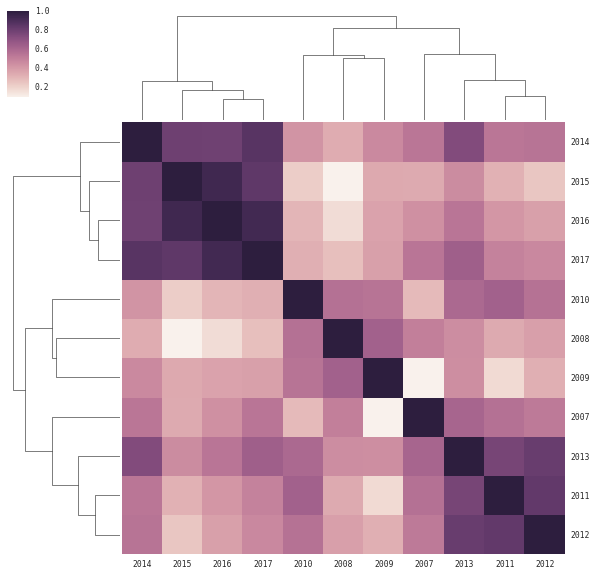

In [4]:
plot = sns.clustermap(GDP.corr())
_ = plt.setp(plot.ax_heatmap.get_yticklabels(), rotation = 0)

# employment

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


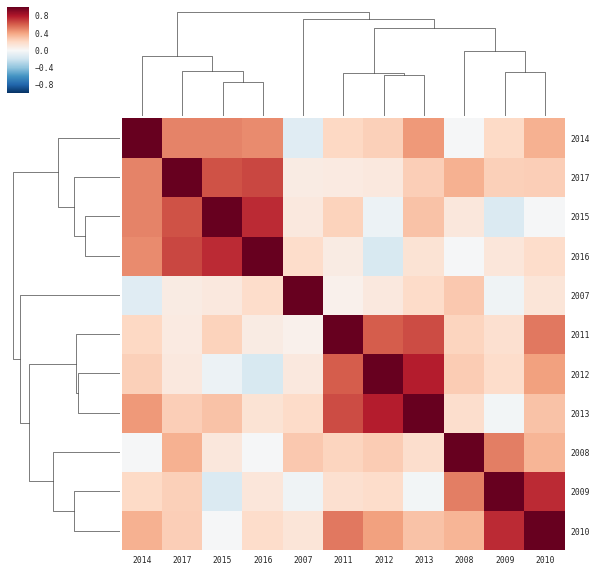

In [5]:
plot = sns.clustermap(employment.corr())
_ = plt.setp(plot.ax_heatmap.get_yticklabels(), rotation = 0)

# hierarchically clustered correlations of growth rates and countries (one-hot encoded)

In [6]:
# one-hot encode countries
GDP_countries_OHE = GDP.country.str.get_dummies()
GDP_countries_OHE.head()

,Australia,Austria,Belgium,Brazil,Canada,Chile,China,Colombia,Costa Rica,Czech Republic,Denmark,Estonia,Euro area,Finland,France,Germany,Greece,Hungary,Iceland,India,Indonesia,Ireland,Israel,Italy,Japan,Korea,Latvia,Lithuania,Luxembourg,Mexico,Netherlands,New Zealand,Norway,OECD,Poland,Portugal,Russian Federation,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
GDP = pd.merge(GDP, GDP_countries_OHE, left_index = True, right_index=True)
GDP.head()

,country,OECD_membership,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Australia,Austria,Belgium,Brazil,Canada,Chile,China,Colombia,Costa Rica,Czech Republic,Denmark,Estonia,Euro area,Finland,France,Germany,Greece,Hungary,Iceland,India,Indonesia,Ireland,Israel,Italy,Japan,Korea,Latvia,Lithuania,Luxembourg,Mexico,Netherlands,New Zealand,Norway,OECD,Poland,Portugal,Russian Federation,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
0,OECD,OECD,2.7,0.2,-3.5,3.0,1.9,1.3,1.2,1.9,2.1,1.8,2.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Euro area,OECD,3.0,0.4,-4.5,2.0,1.6,-0.9,-0.3,1.0,1.6,1.6,1.7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Australia,OECD,4.5,2.5,1.8,2.4,2.6,3.6,2.0,2.6,2.5,2.6,2.9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Austria,OECD,3.5,1.2,-3.6,1.8,3.0,0.7,0.3,0.5,0.8,1.3,1.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Belgium,OECD,3.4,0.7,-2.3,2.7,1.8,0.2,0.0,1.3,1.4,1.2,1.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
# one-hot encode countries
employment_countries_OHE = employment.country.str.get_dummies()
employment_countries_OHE.head()

,Australia,Austria,Belgium,Brazil,Canada,Chile,China,Colombia,Costa Rica,Czech Republic,Denmark,Estonia,Euro area,Finland,France,Germany,Greece,Hungary,Iceland,India,Indonesia,Ireland,Israel,Italy,Japan,Korea,Latvia,Lithuania,Luxembourg,Mexico,Netherlands,New Zealand,Norway,OECD,Poland,Portugal,Russian Federation,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
employment = pd.merge(employment, employment_countries_OHE, left_index = True, right_index=True)
employment.head()

,country,OECD_membership,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Australia,Austria,Belgium,Brazil,Canada,Chile,China,Colombia,Costa Rica,Czech Republic,Denmark,Estonia,Euro area,Finland,France,Germany,Greece,Hungary,Iceland,India,Indonesia,Ireland,Israel,Italy,Japan,Korea,Latvia,Lithuania,Luxembourg,Mexico,Netherlands,New Zealand,Norway,OECD,Poland,Portugal,Russian Federation,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
0,OECD,OECD,1.5,0.6,-1.8,0.3,1.0,1.0,0.7,1.3,1.4,1.5,1.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Euro area,OECD,2.0,0.9,-1.9,-0.5,0.2,-0.6,-0.6,0.6,1.0,1.3,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Australia,OECD,3.1,2.8,0.7,2.0,1.7,1.2,0.9,0.7,1.9,1.9,1.6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Austria,OECD,2.5,1.8,-0.3,0.9,0.9,0.8,0.5,0.2,0.9,1.5,1.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Belgium,OECD,1.7,1.8,-0.1,0.6,1.3,0.4,-0.4,0.3,0.9,1.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## GDP

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


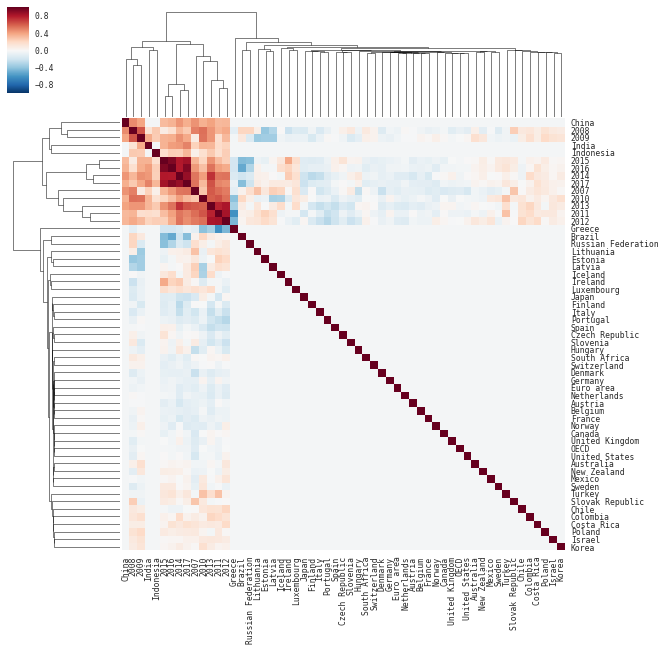

In [10]:
plot = sns.clustermap(GDP.corr())
_ = plt.setp(plot.ax_heatmap.get_yticklabels(), rotation = 0)

## employment (features missing data)

In [11]:
employment.replace(["NaN", 'NaT'], np.nan, inplace = True)
employment.replace([np.inf, -np.inf], np.nan)
employment = employment.dropna()
employment = employment[[column for column in employment.columns if column != "China"]]
employment = employment[[column for column in employment.columns if column != "Costa Rica"]]
employment = employment[[column for column in employment.columns if column != "India"]]
employment = employment[[column for column in employment.columns if column != "Indonesia"]]

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


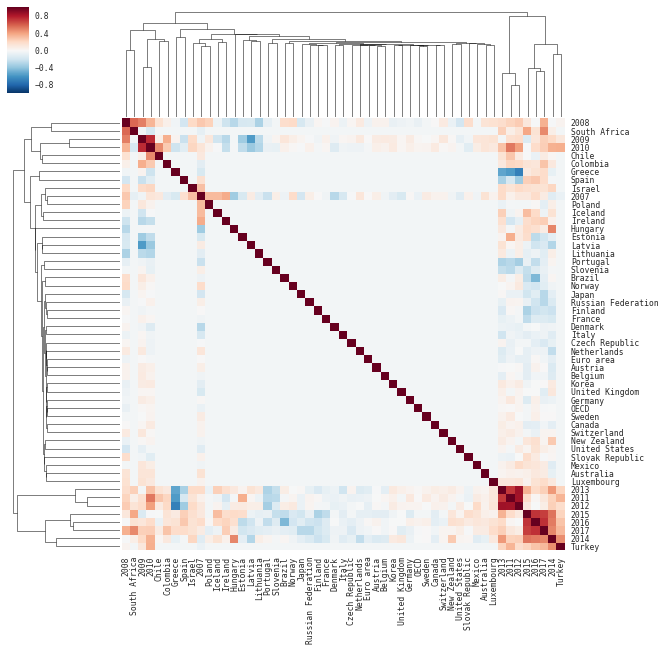

In [12]:
plot = sns.clustermap(employment.corr())
_ = plt.setp(plot.ax_heatmap.get_yticklabels(), rotation = 0)

# compound growth rates

In [13]:
GDP        = GDP_raw
employment = employment_raw

In [14]:
GDP["CAGR"] = GDP.iloc[:, -1].div(GDP.iloc[:, 2]).pow(1. / (len(GDP.columns) - 3)).sub(1)
GDP.sort_values(by = ["CAGR"], ascending = False)

,country,OECD_membership,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,CAGR
14,Hungary,OECD,0.4,0.6,-6.4,0.7,1.8,-1.7,2.0,3.6,3.0,1.6,3.1,0.227242
8,Denmark,OECD,0.8,-0.7,-5.1,1.6,1.2,-0.1,-0.2,1.3,1.2,1.0,1.8,0.084472
35,United States,OECD,1.8,-0.3,-2.8,2.5,1.6,2.2,1.5,2.4,2.4,1.8,2.2,0.020270
18,Italy,OECD,1.3,-1.1,-5.5,1.7,0.7,-2.9,-1.8,-0.3,0.6,1.0,1.4,0.007438
5,Canada,OECD,2.1,1.0,-2.9,3.1,3.1,1.7,2.2,2.5,1.2,1.7,2.2,0.004663
22,Mexico,OECD,3.1,1.2,-4.5,5.1,4.0,3.8,1.6,2.3,2.5,2.6,3.0,-0.003274
41,Indonesia,non-OECD,6.3,6.0,4.7,6.4,6.2,6.0,5.6,5.0,4.8,5.2,5.9,-0.006538
31,Sweden,OECD,3.5,-0.7,-5.1,5.7,2.7,0.1,1.2,2.4,3.8,3.4,2.8,-0.022067
33,Turkey,OECD,4.7,0.7,-4.8,9.2,8.8,2.1,4.2,3.0,4.0,3.9,3.7,-0.023639
0,OECD,OECD,2.7,0.2,-3.5,3.0,1.9,1.3,1.2,1.9,2.1,1.8,2.1,-0.024818


In [15]:
employment["CAGR"] = employment.iloc[:, -1].div(employment.iloc[:, 2]).pow(1./(len(employment.columns) - 3)).sub(1)
employment.sort_values(by = ["CAGR"], ascending = False)

,country,OECD_membership,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,CAGR
45,South Africa,non-OECD,1.3,7.2,-2.7,-2.9,2.0,2.5,3.1,1.9,3.9,2.1,3.6,0.107225
13,Greece,OECD,0.8,1.0,-1.2,-3.6,-7.6,-8.9,-4.9,0.7,2.1,2.1,2.1,0.101318
27,Portugal,OECD,0.3,0.5,-2.9,-1.4,-3.2,-4.1,-2.6,1.6,1.1,-0.3,0.7,0.088423
38,Colombia,non-OECD,1.2,2.0,5.6,4.3,4.2,3.4,1.7,2.2,2.4,2.0,2.6,0.080387
33,Turkey,OECD,1.5,1.7,0.3,6.0,6.1,3.1,2.9,5.1,2.9,3.0,2.8,0.064404
35,United States,OECD,1.1,-0.5,-3.8,-0.6,0.6,1.8,1.0,1.6,1.7,2.1,1.5,0.031501
18,Italy,OECD,0.7,0.8,-1.6,-0.8,0.3,-0.3,-1.5,0.4,0.9,0.8,0.9,0.025450
20,Korea,OECD,1.2,0.6,-0.3,1.4,1.7,1.8,1.6,2.1,1.3,1.2,1.2,0.000000
22,Mexico,OECD,1.7,1.1,0.5,1.1,2.2,3.3,1.1,0.4,2.4,2.0,1.6,-0.006044
21,Luxembourg,OECD,2.3,2.9,1.1,1.6,2.7,2.4,1.8,2.2,1.8,2.1,2.1,-0.009056


## GDP

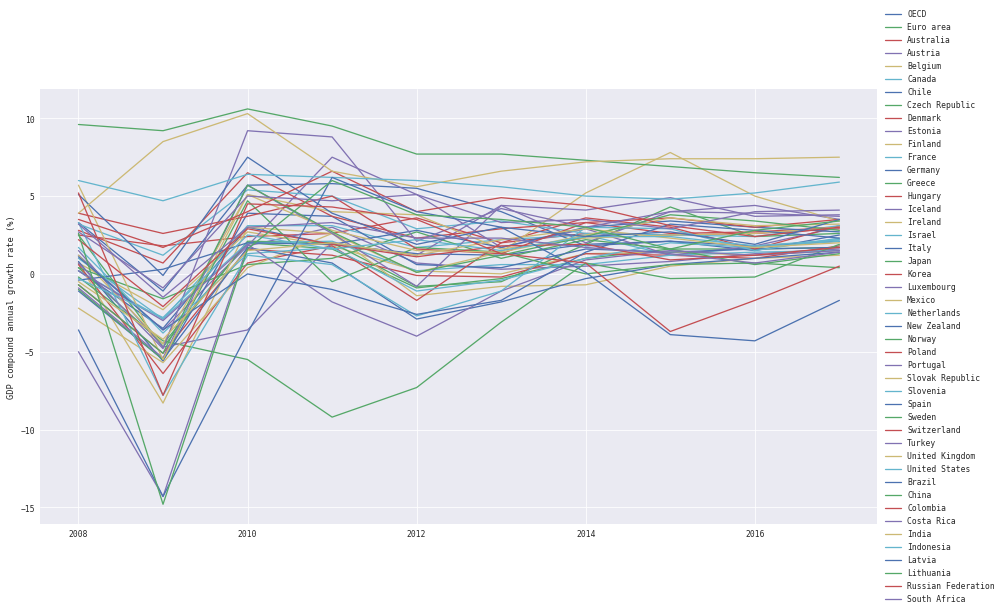

In [16]:
fig = plt.figure(figsize = (15, 8))

for country in GDP["country"].tolist():

    selection = GDP[GDP["country"] == country].ix[:,3:13]

    plt.plot(
        selection.columns.tolist(),
        selection.values.tolist()[0],
        linestyle = "-",
        linewidth = 1.3,
        label     = country
    )

plt.ylabel("year")
plt.ylabel("GDP compound annual growth rate (%)")
plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5))
plt.show()

## employment

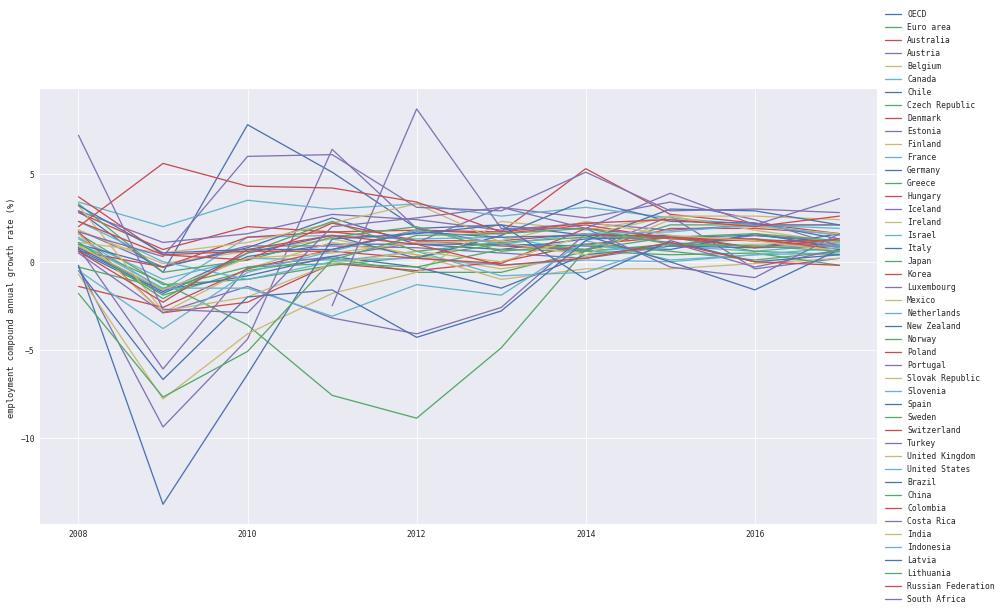

In [17]:
fig = plt.figure(figsize = (15, 8))

for country in employment["country"].tolist():

    selection = employment[employment["country"] == country].ix[:,3:13]

    plt.plot(
        selection.columns.tolist(),
        selection.values.tolist()[0],
        linestyle = "-",
        linewidth = 1.3,
        label     = country
    )

plt.ylabel("year")
plt.ylabel("employment compound annual growth rate (%)")
plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5))
plt.show()